# Oscillations are not well reproduced by  the SI

In [1]:
import matplotlib.pyplot as plt
from bi_sys_id_quantum import *

In [2]:

omega0 = 5.
times = np.linspace(0, 3 * 2. * np.pi / omega0, 500)

In [3]:
original_model = Reconstructed(
    Ac = np.array([[0, 1.], [-omega0 ** 2, 0]]),
    C = [np.array([1, 0.])],
    Nc = [np.array([[0., 1.], [1., 0]])],
    x0 = np.array([0., 0.1])
)

In [4]:
p = 20
u = 1.
original_responses = get_training_responses(original_model, times, p, u) 

In [5]:
reconstructed = bi_sys_id_my_version(
    original_responses.real, 
    alpha = int(original_responses.shape[1] / 2),
    dt = times[1] - times[0],
    v = [u],
    #rank=10
)

In [6]:
reconstructed_responses = get_training_responses(reconstructed, times, p, u) 

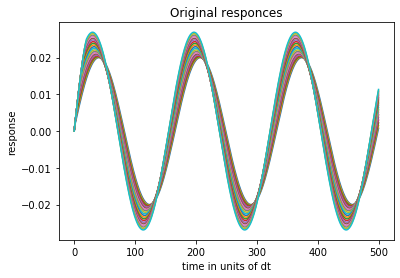

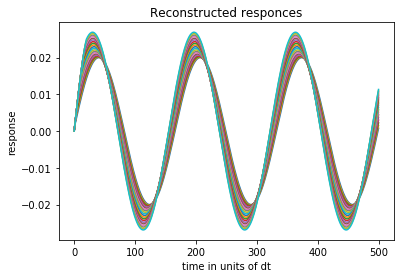

In [7]:
plt.title("Original responces")
plt.plot(original_responses.T)
plt.xlabel("time in units of dt")
plt.ylabel("response")
plt.show()

plt.title("Reconstructed responces")
plt.plot(reconstructed_responses.T)
plt.xlabel("time in units of dt")
plt.ylabel("response")
plt.show()

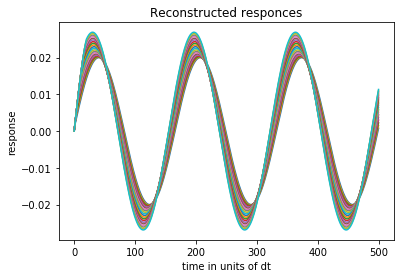

In [9]:
plt.title("Reconstructed responces")
plt.plot(get_training_responses(reconstructed, times, p, u).T)
plt.xlabel("time in units of dt")
plt.ylabel("response")
plt.show()

In [13]:
np.abs(original_responses - get_training_responses(reconstructed, times, p, u)).max()

6.96282262114406e-07

In [14]:
pulse = lambda t: 2.5 * np.sin(20 * (t + 0.1 * t ** 2))

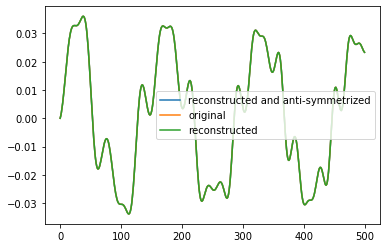

In [16]:
plt.plot(get_response(reconstructed, pulse, times), label='reconstructed and anti-symmetrized')
plt.plot(get_response(original_model, pulse, times), label='original')
plt.plot(get_response(reconstructed, pulse, times), label='reconstructed')

plt.legend()

plt.show()